# Primera Entrega - Proyecto Final - Fabrizio Sgro

![portada.png][def]

[def]: portada.png

## Bank Marketing Data Set

**Fuente:** [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## 1. Variables del dataset
### Datos de los clientes del banco:
1.  Edad: Entero.
2.  Trabajo: Tipo de trabajo (categórico).
3.  Estado civil: Casado, divorciado, soltero. (divorciado aplica también para viudo/a). 
4.  Nivel de educación: Categórico (categórico con diferentes niveles de educación).
5.  Default: ¿Tiene credito en default? (categórico "Yes" o "No").
6.  Hipoteca: ¿Tiene hipoteca? (categorico "No","Yes",'desconocido').
7.  Préstamos personal: ¿Tiene préstamos personal? (categorico "No","Yes","Desconocido").
### Relacionado con el último conctacto con la campaña activa:
8.  Contacto: Tipo de contacto (categorico 'cellular' o 'telephone').
9.  Mes: Último mes en el que se contactó al cliente (categórico, enero, feb, mar, etc.) 
10.  Dia: Último día en el que se contactó al cliente (categórico, lunes, martes, miércoles, jueves, viernes) 
11.  Duración: Duración del último contacto en segundos (entero). No se tendrá en cuenta para el desarrollo del modelo predicitivo. 
### Otros atributos o variables:
12.  Campaña: Número de contactos realizados durante la campaña para cada cliente (entero e incluye el útimo contacto).
13.  Dia_p: Número de días que pasaron después de que el cliente fue contactado entre campaña y campaña (Entero. 999 significa que el cliente no fue previamente contactado).
14.  Previo: Número de contactos realizados antes de esta campaña para cada cliente (Entero)
15.  Previo_result: Resultado de la campaña de marketing previa (categorico: 'fracaso','no existente','exito')


### Variable a predecir:
16.  y - ¿El cliente ha realizado un plazo fijo? Binario: Sí o No. 

## 2. Abstracto 

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo es predecir si el cliente realizará un plazo fijo en el futuro. 

Esto se debe a que el banco quiere maximizar el retorno de inversión que realiza en sus campañas de marketing directo. Si logramos identificar y predecir aquellos consumidores con mayor capacidad de realizar un plazo fijo. Le podríamos ahorrar mucho tiempo y dinero al departamento de marketing directo y telemarketing. Ya que sus llamadas estarían mejor segmentadas y tendrían mayor probabilidad de ser exitosas gracias al análisis de datos y el modelo que se necesita implementar.

Me motiva mucho el análisis de este dataset ya que me permite manejar variables que entiendo por haber estudiado marketing y por otro lado, este dataset podría permitirme la implementación de dos tipos de modelos, supervisado si lo que queremos es lograr predecir la posibilidad de que un consumidor haga un plazo fijo, el actual objetivo. Y una posible alternativa, la identificación y agrupamiento de sectores de consumidores con mayor y menos probabilidad de realizar un plazo fijo.

## 3. Hipótesis
1. Las personas que no tienen hipotecas ni préstamos personales tienen mayor posibilidad de realizar un plazo fijo.
2. Las personas de entre 18-44 tienen menos probabilidad de realizar un plazo fijo que las personas de entre 45-65.
3. Las personas con mayor nivel de educación tienen más probabilidad de realizar un plazo fijo. 
4. La personas casadas tienen más probabilidad de realizar un plazo fijo que las personas solteras.

> Importamos librerías indispensables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


**Nuestro primer análisis estadísitico nos indica:**
- El promedio de clientes tienen una edad de 41 años.
- El balance promedio es de 1362 dólares (puede no ser descriptiva, por que la desviación estandar es muy elevada, cómo indica JANIO MARTINEZ BACHMANN en https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit).
- Se realizaron 63 campañas en total.
- El promedio de días que trascurren antes de ser contactados por una nueva campaña, desde la anterior, son 40 días.
- El promedio de duración de las llamadas a los clientes está alrededor de los 257 segundos, es decir 4 minutos y 28 segundos. 


In [8]:
ss_a_min = 257/60
print('El promedio de duración de llamadas a los clientes es de', int(round(ss_a_min,0)), 'minutos y 28 segundos.')

El promedio de duración de llamadas a los clientes es de 4 minutos y 28 segundos.


> Un poco de limpieza de datos / Data Wrangling

In [9]:
df.isna().sum() # ¿Hay nans? 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> ¡No hay datos faltantes! ¡Vamos! y ¿repetidos?

In [10]:
df.duplicated().sum()

0

¡Tampoco!

> Algunos cambios en las columnas para poder facilitar el análisis exploratorio de datos 

In [11]:
df['loan'] = df.loan.replace(to_replace=['no', 'yes'], value=[0, 1])

In [12]:
df['housing'] = df.housing.replace(to_replace=['no', 'yes'], value=[0, 1])

In [13]:
df['y'] = df.y.replace(to_replace=['no','yes'], value=[0,1])

### Comencemos a probar o eliminar nuestras hipótesis

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
df = df.rename(columns={"y": "p_fijo"}) #cambio de nombre para en el EDA identificar mejor sí hizo o no un depósito de plazo fijo.
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,p_fijo
0,58,management,married,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


> Agrupamos y sumamos para ver la cantidad de personas que han hecho depósitos con y sin préstamos / hipotecas

In [16]:
grouped = df.groupby(['loan', 'p_fijo']).sum(numeric_only = True)


In [17]:
grouped

age   balance  housing     day  duration  campaign    pdays  \
loan p_fijo                                                                    
0    0       1355667  46865491    19093  525716   7351419     94200  1227921   
     1        201315   9115090     1670   72837   2503268     10222   336053   
1    0        274707   5181418     4102  108736   1478641     19432   226093   
     1         19078    427683      265    7335    338483      1102    27317   

             previous  
loan p_fijo            
0    0          16688  
     1           5767  
1    0           3359  
     1            423

In [18]:
loandeposit = df[((df['loan'] == 1) & (df['p_fijo']== 1))] # Contamos la cantidad de filas que coinciden con personas que tienen un préstamos e hicieron un depósito en plazo fijo
loandeposit.p_fijo.count()

484

In [19]:
noloandepositdf = df[((df['loan'] == 0) & (df['p_fijo']== 1))] # Contamos la cantidad de filas de personas que hicieron un depósito de plazo fijo y que no tienen préstamos.
noloandepositdf.p_fijo.count()

4805

In [20]:
listax = ['Con préstamos', 'Sin Préstamos']
listay = [484, 4805]

[Text(0.5, 1.0, 'Cantidad de despositantes con y sin préstamos')]

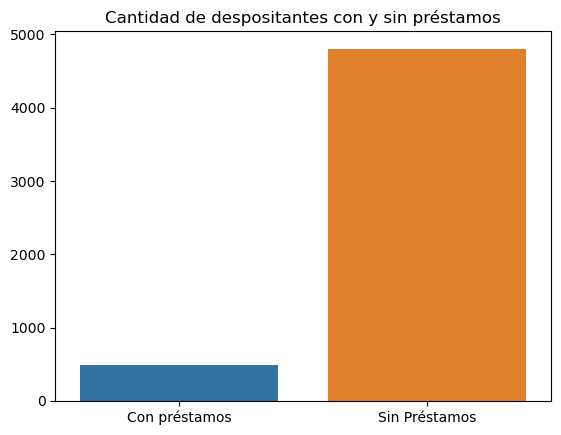

In [21]:
sns.barplot(x= listax, y= listay).set(title = "Cantidad de despositantes con y sin préstamos")

Es mucho mayor el número de depositantes que no tienen préstamo. Esto puede afectar enormemente a la capacidad del algoritmo de preveer sin un cliente del banco es más o menos probable de hacer un depósito.

In [22]:
grouped2 = df.groupby(['housing', 'p_fijo']).sum(numeric_only=True)

In [23]:
grouped2

age   balance  loan     day  duration  campaign    pdays  \
housing p_fijo                                                                
0       0       720850  25337634  2658  271780   3591460     50107   315839   
        1       145442   6721708   219   50860   1563351      7036   212062   
1       0       909524  26709275  4102  362672   5238600     63525  1138175   
        1        74951   2821065   265   29312   1278400      4288   151308   

                previous  
housing p_fijo            
0       0           5853  
        1           3882  
1       0          14194  
        1           2308

In [24]:
housingdeposit = df[((df['housing'] == 1) & (df['p_fijo']== 1))] # Contamos la cantidad de filas que coinciden con personas que tienen una hipoteca e hicieron un depósito en plazo fijo
housingdeposit.p_fijo.count()

1935

In [25]:
nohousingdeposit = df[((df['housing'] == 0) & (df['p_fijo']== 1))] # Contamos la cantidad de filas de personas que hicieron un depósito de plazo fijo y que no tienen hipotecas.
nohousingdeposit.p_fijo.count()

3354

In [26]:
listax2 = ['Con hipoteca', 'Sin hipoteca']
listay2 = [1935, 3354]

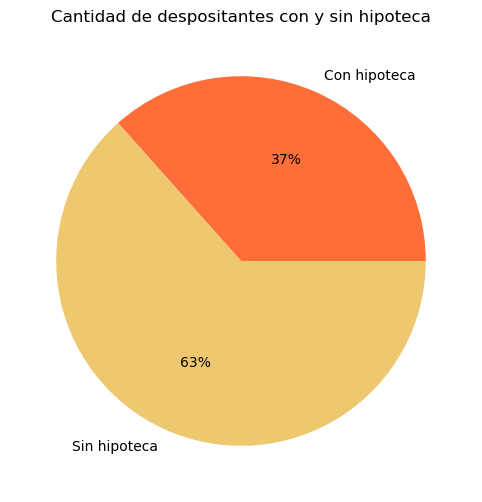

In [27]:
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
palette_color = sns.color_palette('rainbow_r')
plt.pie(listay2, labels= listax2, colors=palette_color, autopct='%.0f%%')
ax.set_title("Cantidad de despositantes con y sin hipoteca")

plt.show()

Es mayor el procentaje de personas que han hecho un depósito sin hipoteca.

In [28]:
df.p_fijo.sum()

5289

In [29]:
grouped3 = df.groupby(['housing', 'loan']).sum(numeric_only=True)
grouped3.reset_index(inplace=True)
grouped3['detalle'] = [1,2,3,4] 
grouped3['detalle'] = grouped3.detalle.replace(1,'no_debts')
grouped3['detalle'] = grouped3.detalle.replace(2, 'only_loan')
grouped3['detalle'] = grouped3.detalle.replace(3, 'only_housing')
grouped3['detalle'] = grouped3.detalle.replace(4, 'both')
grouped3

,housing,loan,age,balance,day,duration,campaign,pdays,previous,p_fijo,detalle
0,0,0,744257,29893786,276338,4437324,48569,479484,8791,3135,no_debts
1,0,1,122035,2165556,46302,717487,8574,48417,944,219,only_loan
2,1,0,812725,26086795,322215,5417363,55853,1084490,13664,1670,only_housing
3,1,1,171750,3443545,69769,1099637,11960,204993,2838,265,both


In [49]:
# definir una función para generar los valores de la nueva columna
def get_debt_status(row):
    if row['housing'] == 0 and row['loan'] == 0:
        return 'no_debts'
    elif row['housing'] == 1 and row['loan'] == 0:
        return 'only_housing'
    elif row['housing'] == 0 and row['loan'] == 1:
        return 'only_loan'
    elif row['housing'] == 1 and row['loan'] == 1:
        return 'both'
    else:
        return 'unknown'

# aplicar la función a cada fila del dataframe y crear la nueva columna
df['debt_status'] = df.apply(get_debt_status, axis=1)

In [66]:
import plotly_express as px

[Text(0.5, 1.0, 'Cantidad de depósitos por tipo de deuda y estado marital')]

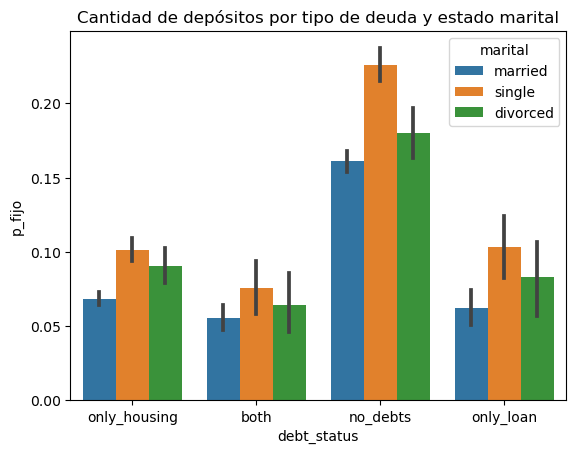

In [73]:
ax = sns.barplot(data=df, x='debt_status', y= 'p_fijo', hue= 'marital')
ax.set(title='Cantidad de depósitos por tipo de deuda y estado marital')

Sin duda las personas csin deudas tienen más posibilidad de hacer un depósito y de ellas las personas solteras. 

[Text(0.5, 1.0, 'Cantidad de depósitos por tipo de deuda y nivel educativo')]

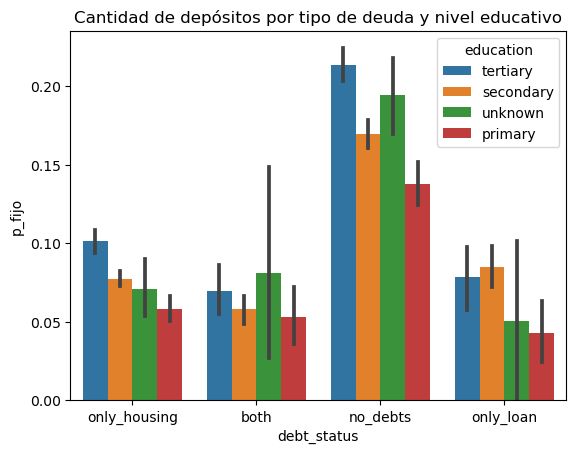

In [64]:
ax = sns.barplot(data=df, x='debt_status', y= 'p_fijo', hue= 'education')
ax.set(title='Cantidad de depósitos por tipo de deuda y nivel educativo')

[Text(0, 0, 'no_debts'),
 Text(1, 0, 'only_loan'),
 Text(2, 0, 'only_housing'),
 Text(3, 0, 'both')]

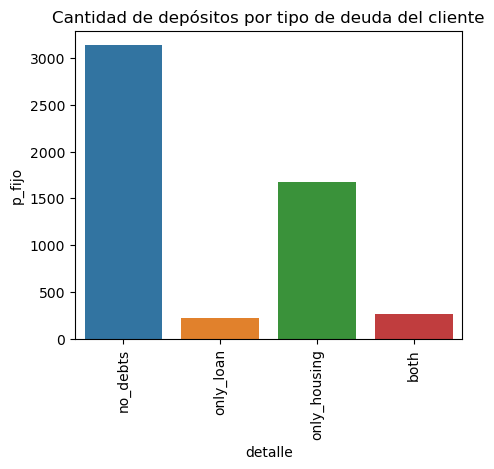

In [30]:
fig,ax = plt.subplots(figsize=(5,4))
ax= sns.barplot(data=grouped3, x='detalle', y= 'p_fijo')
ax.set(title='Cantidad de depósitos por tipo de deuda del cliente')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [31]:
total_endeudados_prestamo = (df['loan'] == 1).sum()
depositantes_endeudados_prestamo = len(df[(df['loan'] == 1) & (df['p_fijo'] == 1)])
porcentaje_depositantes_prestamo = (depositantes_endeudados_prestamo/total_endeudados_prestamo)

total_endeudados_hipoteca = (df['housing'] == 1).sum()
depositantes_endeudados_hipoteca = len(df[(df['housing'] == 1) & (df['p_fijo'] == 1)])
porcentaje_depositantes_hipoteca = (depositantes_endeudados_hipoteca/total_endeudados_hipoteca)


total_endeudados_ambos = df[(df['loan'] == 1) & (df['housing'] == 1)].count()[0]
depositantes_endeudados_ambos = df[(df['loan'] == 1) & (df['p_fijo'] == 1) & (df['housing'] == 1)].count()[0]
porcentaje_endeudados_ambos = (depositantes_endeudados_ambos/total_endeudados_ambos)


print('Del total de personas con préstamos {}, el {:.2%} realizó un depósito. \nMientras que del total de clientes con hipotecas {} un {:.2%} realizó un depósito. \nPor último, del total de clientes endeudados {} un {:.2%} realizó un depósito.'.format(
    total_endeudados_prestamo,porcentaje_depositantes_prestamo,total_endeudados_hipoteca,porcentaje_depositantes_hipoteca,total_endeudados_ambos, porcentaje_endeudados_ambos))

Del total de personas con préstamos 7244, el 6.68% realizó un depósito. 
Mientras que del total de clientes con hipotecas 25130 un 7.70% realizó un depósito. 
Por último, del total de clientes endeudados 4367 un 6.07% realizó un depósito.


In [74]:
porcentajes_deudas = {'deuda': ['préstamo', 'hipoteca', 'ambos'], 'total': [total_endeudados_prestamo,total_endeudados_hipoteca, total_endeudados_ambos], 'porcentaje' : [
    porcentaje_depositantes_prestamo*100, porcentaje_depositantes_hipoteca*100,porcentaje_endeudados_ambos*100]}

porcentajes_deudas_df = pd.DataFrame(porcentajes_deudas)
porcentajes_deudas_df

,deuda,total,porcentaje
0,préstamo,7244,6.681391
1,hipoteca,25130,7.699960
2,ambos,4367,6.068239


[Text(0.5, 1.0, 'Porcentaje de depositantes sobre el total de clientes por tipo de deuda')]

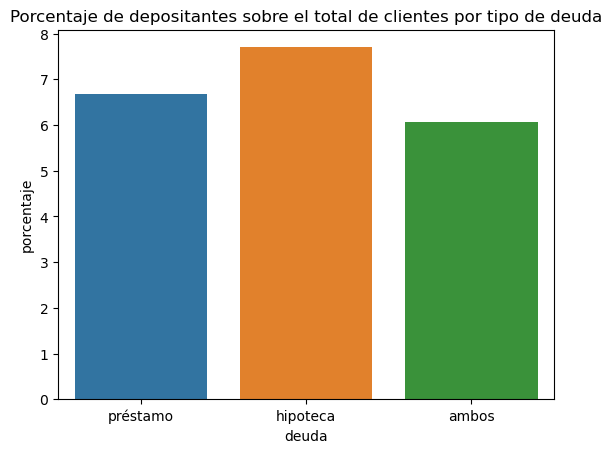

In [75]:
sns.barplot(data= porcentajes_deudas_df, x='deuda', y='porcentaje').set(title= 'Porcentaje de depositantes sobre el total de clientes por tipo de deuda')

Luego de nuestro análisis exhaustivo, sin dudas las personas sin hipotecas ni préstamos son más propensas a realizar un depósito. Como también vimos, aumenta la posibilidad si hablamos de una persona soltera y con un nivel terciario en educación.

> Avancemos con la 2° Hipótesis

In [77]:
edades = df.groupby(df['age']).count()

In [78]:
lista_edades = edades.columns.to_list()
to_drop= lista_edades[0:15]

In [79]:
edades.drop(columns= to_drop, inplace= True)

In [80]:
edades[0:27];

In [81]:
edades[0:27].p_fijo.sum();

In [82]:
edades[27:48].p_fijo.sum();

In [83]:
edades[27:48];

In [84]:
edades[48:-1];

In [85]:
edades[48:-1].p_fijo.sum();

In [86]:
edadesx= ['18-44', '45-65', '66-94']
edadesy= [edades[0:27].p_fijo.sum(), edades[27:48].p_fijo.sum(), edades[48:-1].p_fijo.sum()]

[Text(0.5, 1.0, 'Cantidad de depositantes de plazos fijos por grupo etario')]

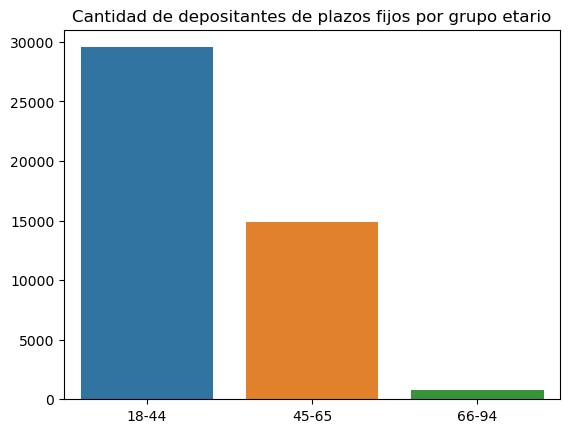

In [87]:
sns.barplot(x= edadesx, y= edadesy).set(title= 'Cantidad de depositantes de plazos fijos por grupo etario')

Al contar el total de depósitos por grupo etario podemos anular nuestra hipótesis de que el grupo etario de entre 18-44 años es menos probable de hacer un depósito. Ya que el gráfico nos está indicando lo contrario.

In [127]:
education = df.groupby(df['education']).sum(numeric_only=True)
education

,age,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
education,,,,,,,,,,
primary,314225,8570258,3894,1024,105652,1753397,19418,247196,3352,591
secondary,927251,26795544,14038,4303,365644,6002027,62664,982686,13173,2450
tertiary,526635,23388697,6378,1784,213967,3438555,37583,519060,8805,1996
unknown,82656,2835183,820,133,29361,477832,5291,68442,907,252


In [129]:
education = education.reset_index()

In [130]:
edx = education.education.unique()
edy = education.p_fijo.unique()
print(edx, edy)

['primary' 'secondary' 'tertiary' 'unknown'] [ 591 2450 1996  252]


[Text(0.5, 1.0, 'Cantidad de depositantes por nivel académico')]

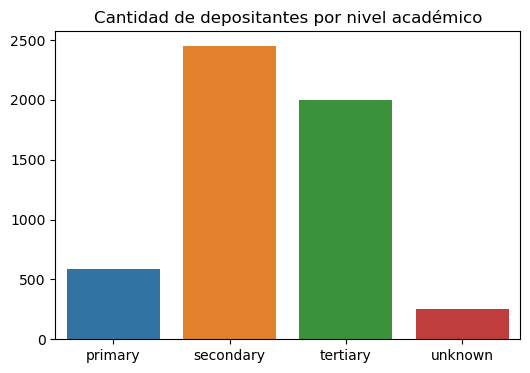

In [131]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=edx, y=edy).set(title = "Cantidad de depositantes por nivel académico")

In [133]:
total_clientes_secundarios = len(df[df['education'] == 'secondary'])
secundario_con_deposito = len(df[(df['education'] == 'secondary') & (df['p_fijo'] == 1)])
porcentaje_secundario = (secundario_con_deposito/total_clientes_secundarios)

total_clientes_terciarios = len(df[df['education'] == 'tertiary'])
terciario_con_deposito = len(df[(df['education'] == 'tertiary') & (df['p_fijo'] == 1)])
porcentaje_terciario = (secundario_con_deposito/total_clientes_terciarios)

print('Del total de clientes con nivel secundario {}, solo el {:.2%} realizó un depósito. \nMientras que del nivel terciario, del total {}, un {:.2%} realizó un depósito'.format(total_clientes_secundarios, porcentaje_secundario,total_clientes_terciarios, porcentaje_terciario))

Del total de clientes con nivel secundario 23202, solo el 10.56% realizó un depósito. 
Mientras que del nivel terciario, del total 13301, un 18.42% realizó un depósito


In [134]:
porcentajes = {'nivel educativo': ['secundario', 'terciario'],'total de clientes' : [total_clientes_secundarios, total_clientes_terciarios], 'total depositantes' : [secundario_con_deposito, terciario_con_deposito], 'porcentaje' : [porcentaje_secundario, porcentaje_terciario]}
porcentaje_df = pd.DataFrame(porcentajes)
porcentaje_df

,nivel educativo,total de clientes,total depositantes,porcentaje
0,secundario,23202,2450,0.105594
1,terciario,13301,1996,0.184197


[Text(0.5, 1.0, 'Porcentaje de depositantes sobre el total de clientes por nivel académico')]

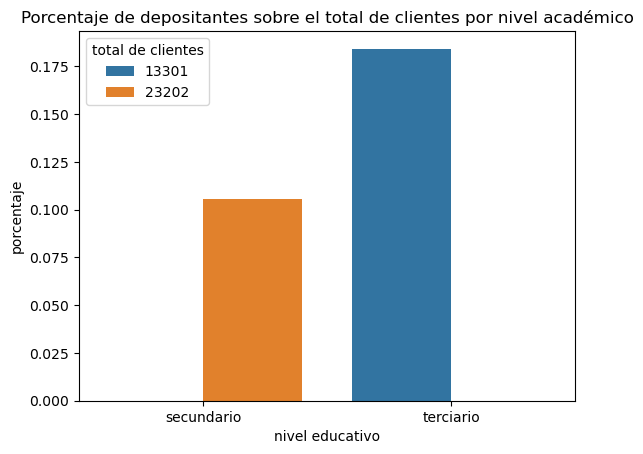

In [137]:
sns.barplot(data= porcentaje_df, x='nivel educativo', y='porcentaje', hue= 'total de clientes').set(title= 'Porcentaje de depositantes sobre el total de clientes por nivel académico')

Nuestra 3° Hipótesis versa sobre que las personas con un nivel de educación terciario son las que tienen mayor probabilidad de hacer un depósito. Puede ser cierto, ya que a pesar que hay más depositantes en total de nivel secundario, en general es menor el porcentaje de depositantes por el total de clientes. En el nivel terciario tenemos menor cantidad de clientes, por lo tanto menor cantidad de depósitos, sin embargo el porcentaje de depositantes sobre el total es mayor, indicando una mayor probabilidad.

> Solo por curiosidad quiero medir el nivel de balance que tienen estos grupos ya que puede pasar que hayan menos depositantes pero que depositen más dinero.

In [138]:
education2 = df.groupby(df['education']).mean(numeric_only=True)
education2

,age,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
education,,,,,,,,,,
primary,45.865567,1250.949934,0.568384,0.149467,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,1154.880786,0.605034,0.185458,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,1758.416435,0.479513,0.134125,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,1526.754443,0.441572,0.071621,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


In [139]:
education2 = education2.reset_index()

In [140]:
ed2x = education2.education.unique()
ed2y = education2.balance.unique()

[Text(0.5, 1.0, 'Promedio de balance por grupo educativo')]

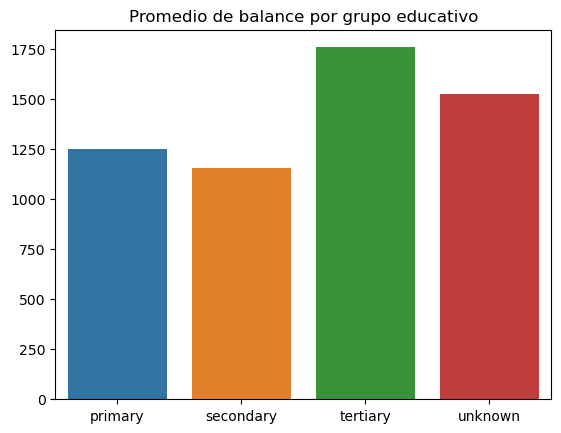

In [141]:
sns.barplot(x=ed2x, y=ed2y).set(title = "Promedio de balance por grupo educativo")

Bueno, el gráfico es revelador, ya que a pesar de que el grupo con nivel educativo terciario tiene menor cantidad de depositantes, su balance tiende a ser mayor, por lo que también es posible asumir que la cantidad de dinero que de positen también debe ser mayor. 

In [142]:
m_state = df.groupby(df['marital']).sum(numeric_only=True)
m_state

,age,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
marital,,,,,,,,,,
divorced,238392,6138388,2907,921,82252,1366927,13699,213496,2871,622
married,1181308,38805139,15321,4660,431464,6896375,77366,1032784,15146,2755
single,431067,16646155,6902,1663,200908,3408509,33891,571104,8220,1912


In [143]:
m_state = m_state.reset_index()
m_state

,marital,age,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
0,divorced,238392,6138388,2907,921,82252,1366927,13699,213496,2871,622
1,married,1181308,38805139,15321,4660,431464,6896375,77366,1032784,15146,2755
2,single,431067,16646155,6902,1663,200908,3408509,33891,571104,8220,1912


In [144]:
msx = m_state.marital.unique()
msy = m_state.p_fijo.unique()

[Text(0.5, 1.0, 'Cantidad de depositantes por estado civil')]

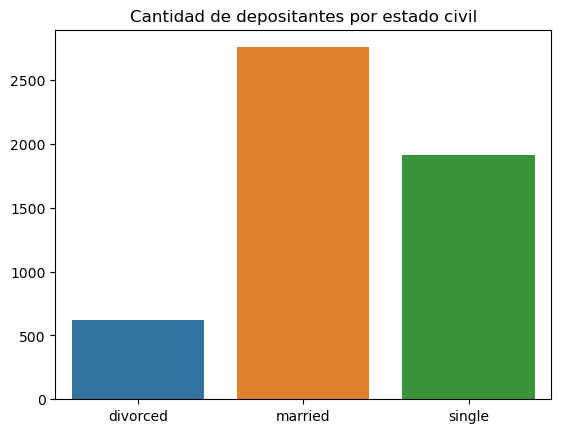

In [145]:
sns.barplot(x=msx, y=msy).set(title = "Cantidad de depositantes por estado civil")

In [146]:
m_state2 = df.groupby(df['marital']).mean(numeric_only=True)
m_state2

,age,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
marital,,,,,,,,,,
divorced,45.782984,1178.872287,0.558287,0.176877,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
married,43.408099,1425.925590,0.562982,0.171235,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
single,33.703440,1301.497654,0.539640,0.130023,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [147]:
m_state2 = m_state2.reset_index()
m_state2

,marital,age,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
0,divorced,45.782984,1178.872287,0.558287,0.176877,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
1,married,43.408099,1425.925590,0.562982,0.171235,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
2,single,33.703440,1301.497654,0.539640,0.130023,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [148]:
ms2x = m_state2.marital.unique()
ms2y = m_state2.balance.unique()

[Text(0.5, 1.0, 'Promedio de balance por estado civil')]

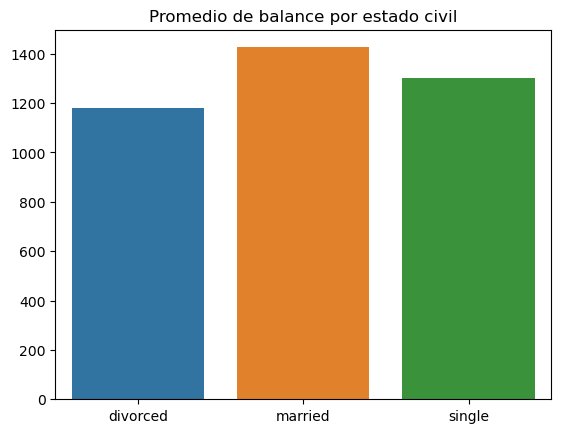

In [149]:
sns.barplot(x=ms2x, y=ms2y).set(title = "Promedio de balance por estado civil")

In [150]:
total_divorciados = len(df[df['marital'] == 'divorced'])
divorciados_depositantes = len(df[(df['marital'] == 'divorced') & (df['p_fijo'] == 1)])
porcentaje_divorciados = (divorciados_depositantes/total_divorciados)

total_casados = len(df[df['marital'] == 'married'])
casados_depositantes = len(df[(df['marital'] == 'married') & (df['p_fijo'] == 1)])
porcentaje_casados = (casados_depositantes/total_casados)

total_solteros= len(df[df['marital'] == 'single'])
solteros_depositantes = len(df[(df['marital'] == 'single') & (df['p_fijo'] == 1)])
porcentaje_solteros = (solteros_depositantes/total_solteros)


print('Del total de divorciados {}, solo el {:.2%} realizó un depósito. \nMientras que de los casados {}, un {:.2%} realizó un depósito \nPor último del total de solteros, {} un {:.2%} realizó un depósito'.format(total_divorciados,porcentaje_divorciados,total_casados,porcentaje_casados,total_solteros,porcentaje_solteros))

Del total de divorciados 5207, solo el 11.95% realizó un depósito. 
Mientras que de los casados 27214, un 10.12% realizó un depósito 
Por último del total de solteros, 12790 un 14.95% realizó un depósito


In [151]:
porcentajes = {'estado civil': ['divorciado', 'casado', 'soltero'],'total de clientes' : [ total_divorciados, total_casados, total_solteros], 'total depositantes' : [divorciados_depositantes,casados_depositantes,solteros_depositantes ], 'porcentaje' : [porcentaje_divorciados, porcentaje_casados, porcentaje_solteros ]}
porcentaje_marital_df = pd.DataFrame(porcentajes)
porcentaje_marital_df

,estado civil,total de clientes,total depositantes,porcentaje
0,divorciado,5207,622,0.119455
1,casado,27214,2755,0.101235
2,soltero,12790,1912,0.149492


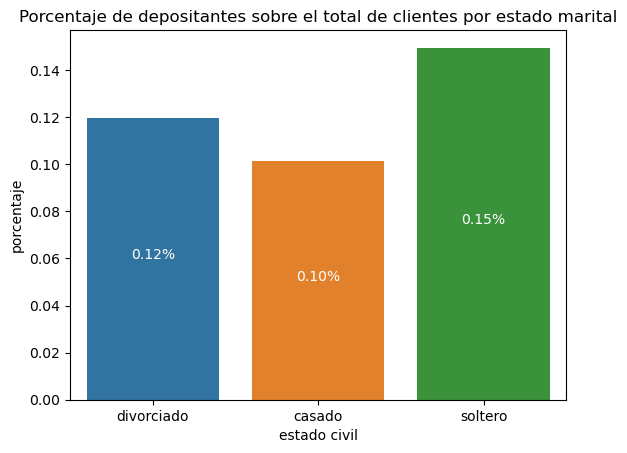

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# crear el gráfico de barras
ax = sns.barplot(data=porcentaje_marital_df, x='estado civil', y='porcentaje')

# agregar las etiquetas de valores en cada barra
for i in range(len(porcentaje_marital_df)):
    ax.text(x=i, y=porcentaje_marital_df.iloc[i]['porcentaje']/2, 
            s="{:.2f}%".format(porcentaje_marital_df.iloc[i]['porcentaje']), 
            ha='center', fontsize=10, color='white')

# establecer el título del gráfico
ax.set(title='Porcentaje de depositantes sobre el total de clientes por estado marital')

# mostrar el gráfico
plt.show()


Para nuestra 4° Hipotesis, que dice que las personas casadas tienen más posibilidad de hacer un depósito, podemos ver que son las personas que mayor cantidad depósitos han hecho. También es mayor la cantidad de clientes del banco que su estado civil es casado. Se encontró que dentro del grupo de clientes solteros, el porcentaje de depósitos es mayor que al resto del grupo. Por lo que a pesar de que la mayoría de clientes casados han hecho un depósito, demuestra que a pesar de ser una minoría, este grupo tiene un poco más de posibilidad de hacer un depósito. En cuanto a la probabilidad como tal, mantengo que la hipótesis es correcta, ya que la mayorái de depositantes es casado y además la diferencia porcentual no es lo suficiente para descartar la hipótesis. 

#### Análisis de probabilidad condicional 

P(A|B)=P(A ∩ B)/P(B)

In [167]:
df.p_fijo.sum()

5289

In [168]:
percent = (5289*100 ) / 45211 

In [169]:
100 - percent

88.30151954170445

45.211 personas, de las cuales solo 5.289 han hecho un depósito. Lo que quiere decir, es que solo un 11,7% de los usuarios, han hecho un depósito. El otro 88,3% de los usuarios, no ha hecho un depósito.

In [171]:
endeudados = df[((df['housing'] == 1) & (df['loan']== 1) & (df['p_fijo'] == 1))] 
endeudados.count()[0]

265

In [172]:
5289-265

5024

De las 5.289 personas, solo 265, han hecho un depósito teniendo un préstamo y una hipoteca. Por lo que es mucho más probable que una persona haga un depósito sin préstamos ni hipotecas (5.024)

> ¿Y entre la hipoteca y el préstamo, cual de las dos repercute más en la posibilidad de hacer un depósito?

In [175]:
hipotecados = df[((df['housing'] == 1) & (df['loan']== 0) & (df['p_fijo'] == 1))]
hipotecados.count()[0]

1670

In [176]:
(1670*100)/5289

31.57496691245982

In [178]:
con_prestamo = df[((df['housing'] == 0) & (df['loan']== 1) & (df['p_fijo'] == 1))]
con_prestamo.count()[0]

219

Por los resultados arrojados, es más posible que una persona con una hipoteca haga un depósito que una persona con un préstamo. De hecho, del total de depósitos, un 31,57% corresponde a personas con hipotecas (pero sin préstamos). 

In [179]:
mayor_prob = df[((df['housing'] == 0) & (df['loan']== 0) & (df['p_fijo'] == 1))]
mayor_prob.count()[0]

3135

In [189]:
resul= (3135)/5289

In [194]:
print('El {:.2%} de depositos es sin préstamo ni hipoteca'.format(resul))

El 59.27% de depositos es sin préstamo ni hipoteca


In [195]:
PA = 5289/45211
PA

0.11698480458295547

In [196]:
PB= 3135/45211
PB

0.0693415319280706

In [197]:
PC=PB/PA
PC*100

59.27396483267159

La probabilidad condicional de que una persona haga un depósito sin préstamos ni hipotecas es del 59% 

# Desafío de consumo de API y DATA WRANGLING:

> Ahora buscaremos ver como se distribuye el balance por tipo de trabajo

Para eso, vamos a utilizar una api que nos permita convertir el valor de euro (el que está en el dataframe, a pesos argentinos)

In [198]:
import requests
import json

In [199]:
url = "https://cdn.jsdelivr.net/gh/fawazahmed0/currency-api@1/latest/currencies/eur/ars.json"
response = requests.request("GET", url)

print(response.text) #Nos trae el precio de conversión del euro a pesos argentinos.

{
    "date": "2023-04-21",
    "ars": 239.205721
}


In [200]:
texto = response.text
json.loads(texto)

{'date': '2023-04-21', 'ars': 239.205721}

In [201]:
jsondata=json.loads(texto)
df2=pd.DataFrame(jsondata, index=[0])
df2.head()

,date,ars
0,2023-04-21,239.205721


In [202]:
df1 = pd.read_csv('bank-full.csv', sep = ';')

In [203]:
df1 = pd.DataFrame(df1)

In [204]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [205]:
df1 = pd.concat([df1,df2], axis=0)

In [206]:
df1 = df1.reset_index()

In [207]:
mask = df1.pop('date')

In [208]:
df1

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ars
0,0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,NaN
1,1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,NaN
2,2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,NaN
3,3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,NaN
4,4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes,NaN
45208,45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes,NaN
45209,45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no,NaN
45210,45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17.0,nov,361.0,2.0,188.0,11.0,other,no,NaN


In [209]:
df1['ars'] = df1['balance'] * df1['ars'][45211]

In [210]:
df1['ars']

0        5.126179e+05
1        6.936966e+03
2        4.784114e+02
3        3.602438e+05
4        2.392057e+02
             ...     
45207    4.135867e+05
45208    1.367061e+06
45209    1.597894e+05
45210    7.106802e+05
45211             NaN
Name: ars, Length: 45212, dtype: float64

In [211]:
df1 = df1.drop(45211)

In [212]:
df1['ars'] = pd.to_numeric(df1['ars'])

In [213]:
df1['ars'] = df1['ars'].astype(int)

In [214]:
df1.rename(columns = {'ars':'ars_balance'}, inplace = True)

In [215]:
df1

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ars_balance
0,0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,512617
1,1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,6936
2,2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,478
3,3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,360243
4,4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,yes,197344
45207,45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes,413586
45208,45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes,1367060
45209,45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no,159789


In [216]:
grouped = df1['ars_balance'].groupby(df1['job']).median()
grouped

job
admin.            94725.0
blue-collar       92811.0
entrepreneur      84200.0
housemaid         97117.0
management       136825.0
retired          188254.5
self-employed    125822.0
services          81209.5
student          120081.0
technician       100705.0
unemployed       126539.0
unknown          161942.0
Name: ars_balance, dtype: float64

In [217]:
groupeddf = pd.DataFrame(grouped)
groupeddf.columns

Index(['ars_balance'], dtype='object')

In [218]:
groupeddf['ars_balance'] = groupeddf['ars_balance'].apply(lambda x: float("{:.2f}".format(x)))
groupeddf

,ars_balance
job,
admin.,94725.0
blue-collar,92811.0
entrepreneur,84200.0
housemaid,97117.0
management,136825.0
retired,188254.5
self-employed,125822.0
services,81209.5
student,120081.0


In [219]:
groupeddf= groupeddf.drop('unknown')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed')])

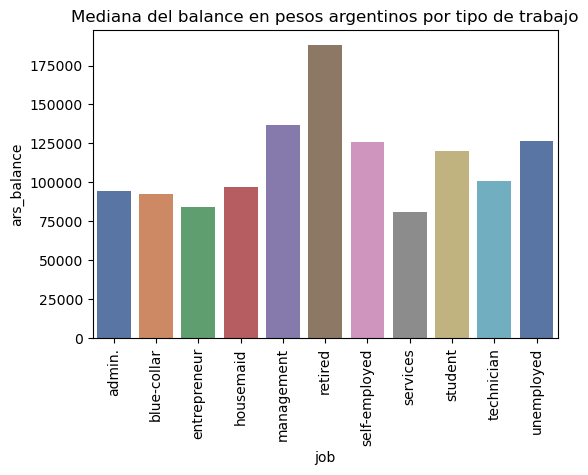

In [220]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data= groupeddf, x= groupeddf.index, y= groupeddf.ars_balance, palette= 'deep')
plt.title('Mediana del balance en pesos argentinos por tipo de trabajo')
plt.xticks(rotation=90)

In [221]:
job_p_fijo_sum = df['p_fijo'].groupby(df['job']).sum()
job_p_fijo_sum

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
Name: p_fijo, dtype: int64

In [222]:
job_p_fijo_sum = pd.DataFrame(job_p_fijo_sum)
job_p_fijo_sum.columns

Index(['p_fijo'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

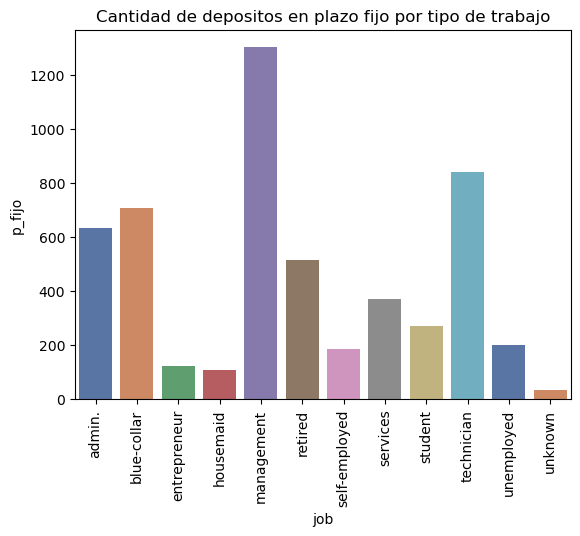

In [223]:
sns.barplot(data= job_p_fijo_sum, x= job_p_fijo_sum.index, y= job_p_fijo_sum.p_fijo, palette= 'deep')
plt.title('Cantidad de depositos en plazo fijo por tipo de trabajo')
plt.xticks(rotation=90)

In [224]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [225]:

url = "https://api.estadisticasbcra.com/plazo_fijo"
headers = {os.getenv('header1') : os.getenv('header2')}
r = requests.get(url, headers=headers)

In [226]:
r.text;

In [227]:
text = r.text
json_bcra= json.loads(text)

In [228]:
df2=pd.DataFrame(json_bcra)
df2.tail()

,d,v
6721,2023-03-31,12675335
6722,2023-04-03,12607471
6723,2023-04-04,12638775
6724,2023-04-05,12714274
6725,2023-04-10,12499273


In [229]:
df2.rename(columns={'d' : 'fecha','v': 'p_fijo'}, inplace = True)

In [230]:
df2['fecha'] =  pd.to_datetime(df2['fecha'], format='%Y-%m-%d')

In [231]:
df2

,fecha,p_fijo
0,1996-01-02,26134
1,1996-01-03,26014
2,1996-01-04,26251
3,1996-01-05,26432
4,1996-01-08,26472
...,...,...
6721,2023-03-31,12675335
6722,2023-04-03,12607471
6723,2023-04-04,12638775
6724,2023-04-05,12714274


In [232]:
type(df2.fecha[0])

pandas._libs.tslibs.timestamps.Timestamp

In [233]:
df2['year'] = df2['fecha'].dt.to_period('Y')

In [234]:
groupeddf2= df2.groupby('year').first()

In [235]:
groupeddf2.reset_index(inplace= True)

In [236]:
groupeddf2

,year,fecha,p_fijo
0,1996,1996-01-02,26134
1,1997,1997-01-02,31063
2,1998,1998-01-02,41465
3,1999,1999-01-04,47203
4,2000,2000-01-03,51103
5,2001,2001-01-02,55496
6,2002,2002-01-02,27630
7,2003,2003-01-02,21746
8,2004,2004-01-02,38165
9,2005,2005-01-03,46113


In [237]:
df2.year= df2.year.astype(str)

In [238]:
groupeddf2.p_fijo = groupeddf2.p_fijo.astype(int)
groupeddf2.year= groupeddf2.year.astype(str)

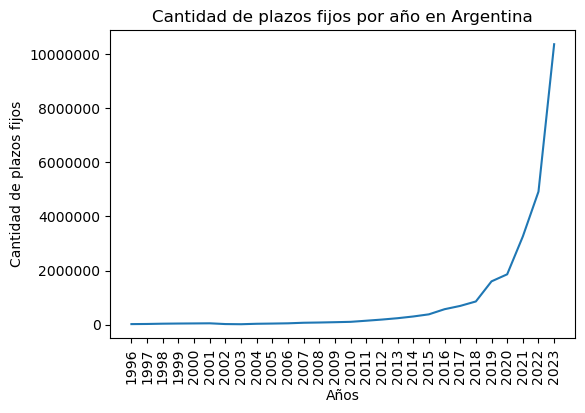

In [239]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(6,4))
plt.style.use('_mpl-gallery')

plt.plot(groupeddf2.year,groupeddf2.p_fijo)

plt.title('Cantidad de plazos fijos por año en Argentina')

plt.ylabel('Cantidad de plazos fijos')

plt.xlabel('Años')

plt.ticklabel_format(axis="y", style='plain')

plt.xticks(rotation=90);

# Desafío de Data Storytelling 28/03/23

En cuanto a las campañas de marketing directo, ¿cuál fue la más efectiva, es decir, cuál de todas generó mayor depósitos en plazo fijo?

>Primero veamos la frecuencia que tuvieron las campañas

In [240]:
df.campaign.value_counts().head(5)

1    17544
2    12505
3     5521
4     3522
5     1764
Name: campaign, dtype: int64

Podemos ver que la campaña con más frecuencia, fue la 1, luego la 2, la 3 y así sucesivamente.

> Veamos ahora que campaña fue más efectiva, es decir, que mayor cantidad de plazos fijos tiene, vamos a aprovechar para cruzar variables

In [241]:
campañas_trabajo= df.groupby(['campaign', 'job']).sum(numeric_only=True).reset_index()
campañas_trabajo

,campaign,job,age,balance,housing,loan,day,duration,pdays,previous,p_fijo
0,1,admin.,87841,2627674,1413,418,33616,558732,123257,1498,339
1,1,blue-collar,144053,4022331,2726,635,52527,971792,186590,1846,322
2,1,entrepreneur,24129,904218,349,129,8332,147663,22447,290,48
3,1,housemaid,20240,576711,147,45,6250,107081,12784,169,47
4,1,management,139862,6470752,1875,496,51762,903054,177292,2512,589
...,...,...,...,...,...,...,...,...,...,...,...
322,50,blue-collar,70,710,2,1,54,212,-2,0,0
323,51,management,30,358,1,0,19,88,-1,0,0
324,55,technician,35,432,1,0,21,1094,-1,0,0
325,58,technician,24,126,1,0,20,10,-1,0,0


In [242]:
campañas_trabajo = campañas_trabajo[campañas_trabajo['campaign'] <= 4]

In [243]:
import plotly.express as px

px.bar(campañas_trabajo, x= 'campaign', y= 'p_fijo', title="Cant. de plazos fijos por campaña y tipo de trabajo", 
       labels= {
           'p_fijo' : 'cant. de plazos fijos' , 
           'campaign' : 'Campañas', 
           'job' : 'trabajos'}, 
       color='job')

Fácilmente, podemos ver también, que la frecuencia pudo haber tenido algo que ver con la efectividad en los depósitos. Aprovechamos a ver por cantidad de plazos fijos y el tipo de trabajo que más estuvo presente en la campaña.

Por ejemplo: La campaña 1,2, 3 tienen más depósitos el tipo de trabajo "Blue Collar". En la campaña 4 no, gana "management". Por poco. 

Lo que podemos concluir viendo este gráfico, es que los tipos de trabajo de "Blue Collar", "Management", "technician" son los tipos de trabajo que más depósitos han realizado y esto puede servir, para en un futuro, hacer un target específico a estos grupos.

In [244]:
campañas_marital= df.groupby(['campaign', 'marital']).sum(numeric_only=True).reset_index()
campañas_marital.head()

,campaign,marital,age,balance,housing,loan,day,duration,pdays,previous,p_fijo
0,1,divorced,97616,2588752,1233,397,30862,567530,104660,1200,305
1,1,married,435818,15046932,5935,1738,147375,2557074,478478,6081,1283
2,1,single,179989,7190140,2950,694,80465,1455321,284916,3533,973
3,2,divorced,64565,1682446,781,220,22460,396758,58836,776,176
4,2,married,330480,10928739,4225,1308,117814,2063587,298555,4413,736


In [245]:
campañas_marital = campañas_marital[campañas_marital['campaign'] <= 4]

In [246]:
px.bar(campañas_marital, x= 'campaign', y= 'p_fijo', title="Cantidad de plazos fijos por campaña y por tipo de estado marital", 
       labels= {
    'p_fijo' : 'cant. de plazos fijos' , 
    'campaign' : 'Campañas', 
    'marital' : 'estado marital'}, 
       color='marital')

Con este gráfico podemos ver que las personas con estado marital "Casado", y "Single" son los estados maritales que mayor depósitos hicieron, por lo tanto, vemos una alta posibilidad de que en futuras campañas, estos dos grupos sean los más receptivos a realizar un depósito fijo.

En conclusión, viendo los dos gráficos podemos concluir en que la campaña 1 tuvo más difusión, más contactos y esto tuvo una gran causalidad con los resultados de depósitos. También vemos una similitud en todas las campañas con los tipos de trabajo y estado marital en cada campaña. Por lo tanto, podemos deducir que las campañas tuvieron una gran diferencia en la cantidad de personas contactadas.

> En cuanto a los meses, existirá algún patrón, algún mes o meses que indiquen un patrón? 

In [258]:
month_grouped= df.groupby('month').sum(numeric_only=True).sort_values(by='month', ascending=True).reset_index()

In [259]:
import datetime

In [260]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_grouped["month"] = pd.Categorical(month_grouped["month"], categories=months, ordered=True)
month_grouped.sort_values("month", inplace=True)

In [261]:
df2["month"] = pd.DatetimeIndex(df2["fecha"]).strftime("%b").str.lower()
df2["year"] = pd.DatetimeIndex(df2["fecha"]).year

In [262]:
arg_month = df2.groupby('month').sum(numeric_only=True).reset_index()     

In [263]:
arg_month["month"] = pd.Categorical(arg_month["month"], categories=months, ordered=True)
arg_month.sort_values("month", inplace=True)

In [265]:
arg_month['valor_normalizado'] = ((arg_month.p_fijo - arg_month.p_fijo.min())/ (arg_month.p_fijo.max()-arg_month.p_fijo.min()))

,month,p_fijo,year,valor_normalizado
4,jan,599968243,1201671,0.795710
3,feb,538576492,1092995,0.549057
7,mar,650815992,1169461,1.000000
0,apr,423425155,1064782,0.086416
8,may,401916256,1114948,0.000000
6,jun,422366244,1092938,0.082162
5,jul,463383675,1155133,0.246957
1,aug,494896530,1145154,0.373565
11,sep,513683086,1159183,0.449044
10,oct,500998680,1145045,0.398082


In [267]:
month_grouped['valor_normalizado'] = ((month_grouped.p_fijo - month_grouped.p_fijo.min())/ (month_grouped.p_fijo.max()-month_grouped.p_fijo.min()))

,month,age,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo,valor_normalizado
4,jan,56812,1328337,521,212,38522,376313,2346,95261,1663,142,0.050909
3,feb,108305,3494293,1132,390,16834,657742,6310,181994,3133,441,0.413333
7,mar,20483,976051,113,26,6742,116579,1052,33976,567,248,0.179394
0,apr,116608,4522760,2069,358,50774,874026,5733,279132,3086,577,0.578182
8,may,535375,14247708,12076,1993,213251,3591856,33693,717998,8053,925,1.000000
6,jun,226662,8589515,2227,734,60885,1298332,16746,48894,1057,546,0.540606
5,jul,282756,6205676,3338,2105,128897,1847690,24301,55383,896,627,0.638788
1,aug,267962,8918853,1103,604,102655,1451816,24534,83266,1739,688,0.712727
11,sep,25452,1128061,129,30,6872,169214,1022,66248,1097,269,0.204848
10,oct,33868,1706530,167,55,13120,212767,1134,62256,1140,323,0.270303


In [273]:
# Crear trazas de línea
trace1 = go.Scatter(x=arg_month['month'], y=arg_month['valor_normalizado'], name='Argentina', mode='lines')
trace2 = go.Scatter(x=month_grouped['month'], y=month_grouped['valor_normalizado'], name='Portugal', mode='lines')

# Crear una lista de datos
data = [trace1, trace2]

# Crear un objeto Layout
layout = go.Layout(title='Comparación entre la cantidad de plazos fijos en argentina y en el banco de Portugal', xaxis_title='Meses', yaxis_title='Cantidad de plazos fijos') 

# Crear la figura
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura
fig.show()


Se puede ver una especie de inversión en las tendencias. Es decir, en enero en aRgentina tenemos un punto de grandes cantidades de plazo fijo pero en Portugal no. En Mayo se registra el menor mes de plazos fijos en argentina, pero el mayor mes en Portugal. Esto puede indicar algún patrón relacionado a la estacionalidad. Sin embargo en ambos países de Junio a Agosto se registra una misma pendiente. De todas formas la gran cantidad de diferencia en los datos de cada dataset puede que no permita hacer una conclusión precisa.

In [276]:
px.bar(df.poutcome.value_counts(), color= df.poutcome.unique())

La gran mayoría de resultados de las campañas, no están registrados, se desconoce o han fallado.

In [277]:
corr = df.corr(numeric_only=True)

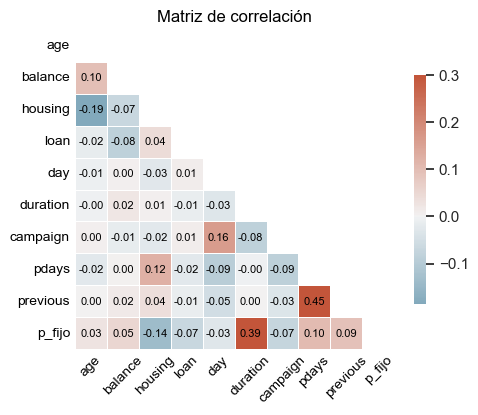

In [290]:
# generar una máscara para la diagonal superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# establecer el tamaño del gráfico
f, ax = plt.subplots(figsize=(5, 5))

# generar una paleta de colores personalizada
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# establecer el color para los cuadrados por encima de la diagonal
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# dibujar el heatmap con la máscara y el ratio de aspecto correcto
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f', annot_kws={"fontsize":8, "color":'black'})

# personalizar el gráfico
ax.set_title('Matriz de correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# mostrar el gráfico
plt.show()


Podemos ver que nuestras variables númericas no están muy relacionadas. Sobre todo en la variable objetivo "p_fijo".

# Obtención de insights 06 de abril de 2023 

Qué paso con los resultados de campañas anteriores, podremos encontrar algo claro con respecto al resultado de la campaña anterior y como refleja esto en la cantidad de depósitos?

In [ ]:
outcome_grouped = df.groupby('poutcome').sum()
outcome_grouped.reset_index(inplace=True)
outcome_grouped

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=outcome_grouped, x='poutcome', y='p_fijo').set(title="Cantidad de plazos fijos por resultado de la campaña anterior")
plt.ylabel('Cantidad de plazos fijos')
plt.xlabel('Resultado de la campaña anterior')

La gran mayoría de plazos fijos no se sabe de que campaña anterior fue, en segundo lugar, los plazos fijos que el resultado de la campaña anterior fue exitoso es el que mayor cantidad registra. sorprende que en 3er lugar esté el resultado de fracaso en la campaña anterior. Esto puede indicar, que a pesar de que una campaña no tenga un resultado deseado, no quita la posibilidad de que la persona haga un depósito. También nos da a entender que hay que mejorar el sistema de creación de datos porque la gran mayoría de depósito se desconocer el resultado de la campaña anterior.

In [ ]:
columns= ['age', 'balance','day', 'month', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
def scatter_columns_in_grid(df, columns):
    # Create a PairGrid
    g = sns.PairGrid(df[columns])

    # Map a scatter plot onto each subplot
    g.map(sns.scatterplot, hue= df.marital, legend=True)
    plt.show()

In [ ]:
scatter_columns_in_grid(df,columns)

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x='age', y='balance', hue= 'job').set(title='Distribución del balance por edad')

In [ ]:
days_group= df.groupby(['day','campaign']).sum(numeric_only=True)
days_group.reset_index(inplace=True)
days_group

In [ ]:
sns.jointplot(data=days_group, x='day', y= 'p_fijo', hue=df.marital)

In [ ]:
month_group= df.groupby(['month','campaign']).sum(numeric_only=True)
month_group.reset_index(inplace=True)
month_group

Pareciera haber una mayor cantidad de plazos fijos realizados entre el día 10 y el 20. 

In [ ]:
f,ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=days_group, x=df.balance, y='p_fijo',hue=df.education, size=df.education,sizes=(20, 200), legend="full").set(title='Cantidad de plazos fijos por total de balance según nivel académico')

In [ ]:
f,ax= plt.subplots(figsize=(5,5))
sns.histplot(data=df, x='age', hue='marital', multiple="stack").set(title="Distribución de la edad por estado marital")

Como ya sabemos que estado marital tiene mayor probabilidad de hacer un plazo fijo, podríamos definir la edad objetivo de las personas entre los 30 y los 60. Ya que la gran mayoría de personas está casada entre esas edades. Podríamos ajustar las campañas de marketing para este grupo de personas sabiendo que son las que mayor posibilidad de inversión pueden hacer.

In [ ]:
df_renamed= pd.read_csv('bank-full.csv', sep=';')
df_renamed

In [ ]:
sns.catplot(x="age", y="marital", hue="y", kind="bar", data=df_renamed)

In [ ]:
pivot_df = df.pivot_table(values='p_fijo', index='marital', columns='age', aggfunc='sum')
pivot_df

In [ ]:
# Ajusta el tamaño del gráfico
plt.figure(figsize=(10,6))

# Crea un heatmap con Seaborn y ajusta el tamaño de la fuente de las etiquetas de datos
sns.heatmap(pivot_df, cmap='Blues', annot=True, fmt='g', cbar=True, annot_kws={"fontsize":5})

# Añade etiquetas a los ejes y el título
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Estado Marital', fontsize=14)
plt.title('Cantidad de depósitos a plazo fijo por grupo etario y estado civil', fontsize=16)

# Muestra el gráfico
plt.show()

Aquí podemos ver específicamente que para solteros entre 25 y 32 años es lo más ótimo.

Para casados, entre los 31 y 42. 

Con esta información podemos ver que no es muy buena idea invertir por personas divorciadas.

# Pre-Entrega 18/04/23
Selección y entrenamiento de un modelo para forecasting de próximos depósito y predicción de plazo fijo por features.

In [294]:
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression



# Define your input features and target variable
features = ['job', 'marital','education','default','contact', 'month', 'poutcome']
numerical_features = ['age','balance','housing','loan','duration','campaign','pdays', 'previous']
enc = OneHotEncoder()
enc.fit(df[features])
cat_features_encoded = enc.transform(df[features])

X = np.concatenate((cat_features_encoded.toarray(), df[numerical_features]), axis=1)
y = df['p_fijo']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract the categorical features from your input data
cat_features_train = X_train[:, :len(features)]
cat_features_test = X_test[:, :len(features)]

# Create an instance of OneHotEncoder
enc = OneHotEncoder()

# Fit the encoder to the categorical features in the training set
enc.fit(cat_features_train)

# Transform the categorical features in the training and test sets into binary vectors
cat_features_train_encoded = enc.transform(cat_features_train)
cat_features_test_encoded = enc.transform(cat_features_test)

# Combine the encoded categorical features with the numerical features in the training and test sets
X_train_encoded = np.concatenate((cat_features_train_encoded.toarray(), X_train[:, len(features):]), axis=1)
X_test_encoded = np.concatenate((cat_features_test_encoded.toarray(), X_test[:, len(features):]), axis=1)

# Train an SVM classifier on the encoded training data
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_encoded)

# Evaluate the accuracy of the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.54      0.01      0.01      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.50      0.47      9043
weighted avg       0.84      0.88      0.82      9043



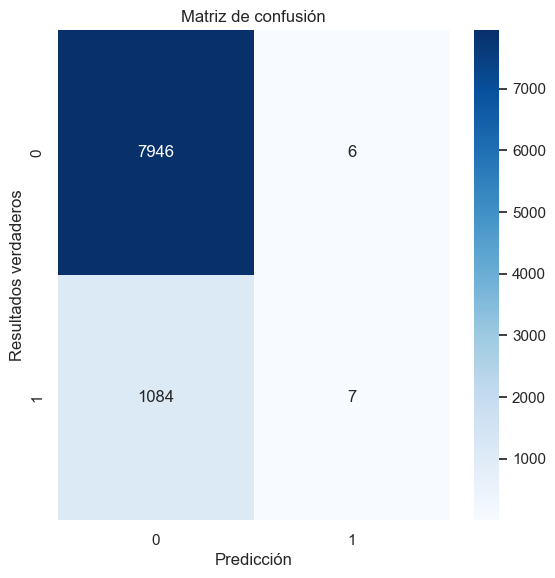

In [295]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax,fig= plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels to the plot
plt.xlabel("Predicción")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión")

# Show the plot
plt.show()

In [314]:
le = LabelEncoder()

df_to_encode = df

df_to_encode[['job', 'marital','education', 'poutcome']] = df_to_encode[['job', 'marital','education', 'poutcome']].apply(le.fit_transform)


# Define your input features and target variable
features = ['job','age', 'marital', 'education','housing', 'loan', 'duration']

# Split your data into training and test sets

X = df_to_encode[features]
y = df['p_fijo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Train an SVM classifier on the encoded training data
clf = svm.SVC()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_clf = clf.predict(X_test)

# Evaluate the accuracy of the classifier
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7996
           1       0.60      0.19      0.28      1047

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.61      9043
weighted avg       0.87      0.89      0.87      9043



In [320]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = df_to_encode[features].values

y = df['p_fijo']

# Define your input features and target variable

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN y ajustarlo a los datos de entrenamiento
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# Evaluar el rendimiento del modelo en los datos de prueba
score = knn.score(X_test, y_test)
print(classification_report(y_test,y_pred_knn))


c:\Users\Fabrizio\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\Fabrizio\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.52      0.18      0.26      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.58      0.60      9043
weighted avg       0.85      0.88      0.85      9043



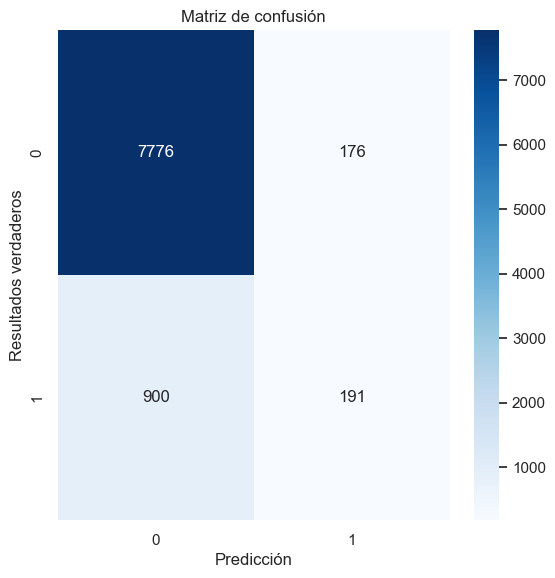

In [321]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
ax,fig= plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels to the plot
plt.xlabel("Predicción")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión")

# Show the plot
plt.show()

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_clf)
ax,fig= plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels to the plot
plt.xlabel("Predicción")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión")

# Show the plot
plt.show()

In [ ]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovr')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


scores = cross_val_score(clf, X, y, cv=2)

r2 = r2_score(y_test,y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Cross-validation scores:", scores)

print("Mean cross-validation score:", scores.mean())

# Calculamos la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculamos las métricas de validación utilizando classification_report()
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Calculamos la especificidad
specificity = tn / (tn + fp)
print('Especificidad:', specificity)

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_clf)
ax,fig= plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels to the plot
plt.xlabel("Predicción")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión")

# Show the plot
plt.show()

In [ ]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
 
r2 = r2_score(y_test,y_pred_gnb)
 
print(classification_report(y_test, y_pred_gnb),"R2 Score:",r2)

#Ploteo de la matriz 

cm = confusion_matrix(y_test, y_pred_gnb)
ax,fig= plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels to the plot
plt.xlabel("Predicción")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión")

# Show the plot
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
ypred_model = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=3, scoring='r2')

r2 = r2_score(y_test,ypred_model)

# Imprimir los resultados de cada iteración y la media de los resultados
print("Scores: ", scores)
print("Mean score: ", np.mean(scores))
print("R2 score:", r2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
ypred_model = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=3, scoring='r2')

r2 = r2_score(y_test,ypred_model)

# Imprimir los resultados de cada iteración y la media de los resultados
print("Scores: ", scores)
print("Mean score: ", np.mean(scores))
print("R2 score:", r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
ypred_model = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=3, scoring='r2')

r2 = r2_score(y_test,ypred_model)

# Imprimir los resultados de cada iteración y la media de los resultados
print("Scores: ", scores)
print("Mean score: ", np.mean(scores))
print("R2 score:", r2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
rfc.fit(X_train, y_train)

ypred_model = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
scores = cross_val_score(model, X, y, cv=3, scoring='r2')

r2 = r2_score(y_test,ypred_model)

# Imprimir los resultados de cada iteración y la media de los resultados
print("Scores: ", scores)
print("Mean score: ", np.mean(scores))
print("R2 score:", r2)
print("Accuracy:", accuracy)


El estado actual de mis modelos me da para concluir según mi interpretación, que hay un desequilibrio en los datos, donde la clase positiva (verdaderos positivos) está menos representada en comparación con la clase negativa (verdaderos negativos). Esto puede llevar a una mayor tasa de falsos positivos, lo que puede ser una consecuencia de la naturaleza del conjunto de datos. Por lo tanto, es importante ajustar los modelos para lograr un equilibrio entre la precisión y la recuperación. El valor F1 de los verdaderos positivos de 0.36 sugiere que el modelo está teniendo dificultades para detectar correctamente los verdaderos positivos, lo que indica la necesidad de ajustar los modelos y explorar estrategias para aumentar la detección de verdaderos positivos y reducir la tasa de falsos positivos.



